In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import scipy.ndimage.morphology as morphOps
from PIL import Image

In [47]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

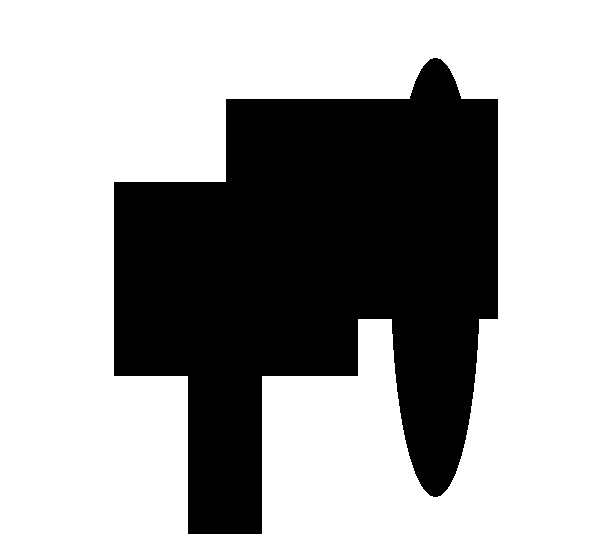

In [48]:
fileName = "yyy.jpg"
I=Image.open(fileName)
I

In [49]:
I = I.resize((np.array(I.size) * 0.3).astype(int))
I = np.asarray(I)

In [50]:
I = rgb2gray(I)
# I = 1 - I
I[I<128] = 1
I[I>128] = 0
print(I.shape)

(167, 180)


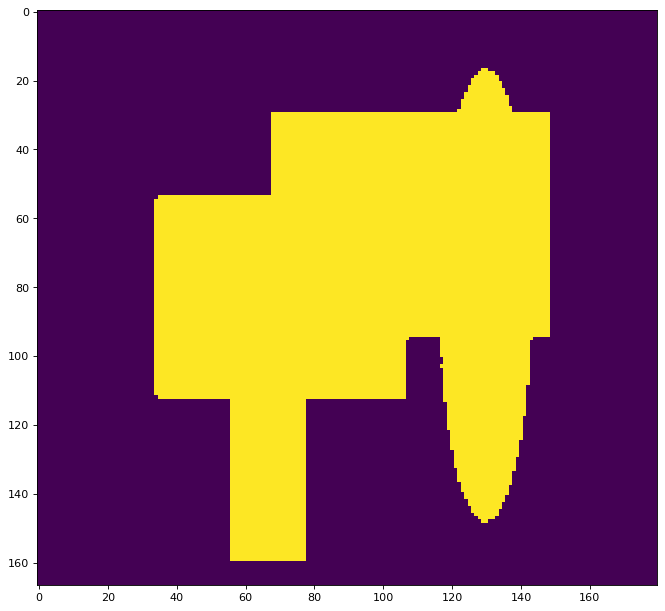

In [51]:
plt.figure(figsize=(10, 10), dpi=80)
imgplot = plt.imshow(I)
plt.show()

In [52]:
number_of_samples = 60
epsilon = 1 
flux_threshold = 18

In [53]:
distImage,IDX = morphOps.distance_transform_edt(I,return_indices=True)

In [54]:
distImage.shape

(167, 180)

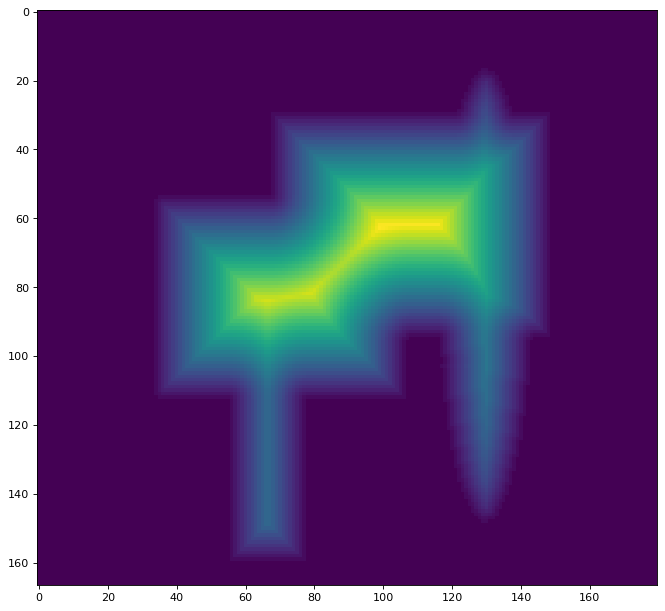

In [55]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(distImage)
plt.show()

In [56]:
def sample_sphere_2D(number_of_samples):
    sphere_points = np.zeros((number_of_samples,2))
    alpha = (2*math.pi)/(number_of_samples)
    for i in range(number_of_samples):
        sphere_points[i][0] = math.cos(alpha*(i-1))
        sphere_points[i][1] = math.sin(alpha*(i-1))
    return sphere_points

In [58]:
sphere_points = sample_sphere_2D(number_of_samples)

In [59]:
def sub2ind(array_shape, rows, cols):
    ind = rows*array_shape[1] + cols
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    return ind

def ind2sub(array_shape, ind):
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    rows = (ind.astype('int') / array_shape[1])
    cols = ind % array_shape[1]
    return (rows, cols)

def compute_aof(distImage ,IDX,sphere_points,epsilon):

    m = distImage.shape[0]
    n = distImage.shape[1]
    normals = np.zeros(sphere_points.shape)
    fluxImage = np.zeros((m,n))
    for t in range(0,number_of_samples):
        normals[t] = sphere_points[t]
    sphere_points = sphere_points * epsilon
    
    XInds = IDX[0]
    YInds = IDX[1]
    
    for i in range(0,m):
        print(i)
        for j in range(0,n):       
            flux_value = 0
            if (distImage[i][j] > -1.5):
                if( i > epsilon and j > epsilon and i < m - epsilon and j < n - epsilon ):
#                   sum over dot product of normal and the gradient vector field (q-dot)
                    for ind in range (0,number_of_samples):
                                                
#                       a point on the sphere
                        px = i+sphere_points[ind][0]+0.5;
                        py = j+sphere_points[ind][1]+0.5;
                        
                        
                        
                        
#                       the indices of the grid cell that sphere points fall into 
                        cI = math.floor(i+sphere_points[ind][0]+0.5)
                        cJ = math.floor(j+sphere_points[ind][1]+0.5)
                                               

#                       closest point on the boundary to that sphere point

                        bx = XInds[cI][cJ]
                        by = YInds[cI][cJ]
#                       the vector connect them
                        qq = [bx-px,by-py]
                    
                        d = np.linalg.norm(qq)
                        if(d!=0):
                            qq = qq / d
                        else:
                            qq = [0,0]                        
                        flux_value = flux_value + np.dot(qq,normals[ind])
            fluxImage[i][j] = flux_value  
    return fluxImage

In [60]:
fluxImage = compute_aof(distImage,IDX,sphere_points,epsilon)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166


In [61]:
print(fluxImage.shape)

(167, 180)


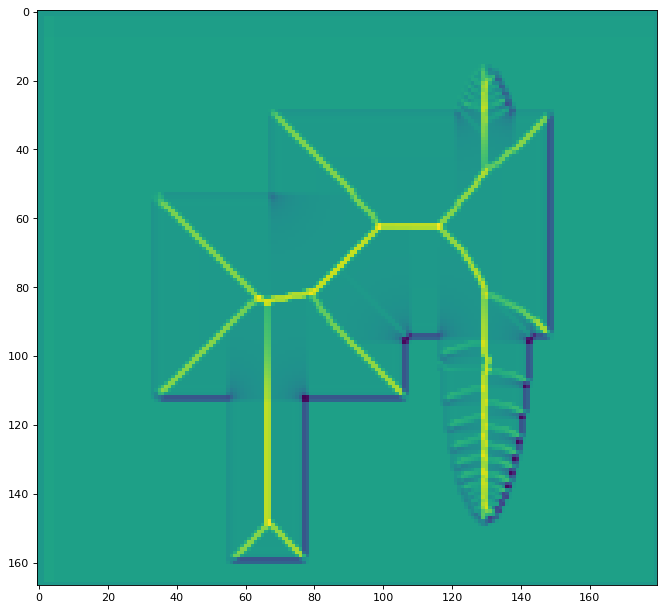

In [62]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(fluxImage)

In [63]:
skeletonImage = fluxImage
skeletonImage[fluxImage < flux_threshold] = 0
skeletonImage[fluxImage > flux_threshold] = 1

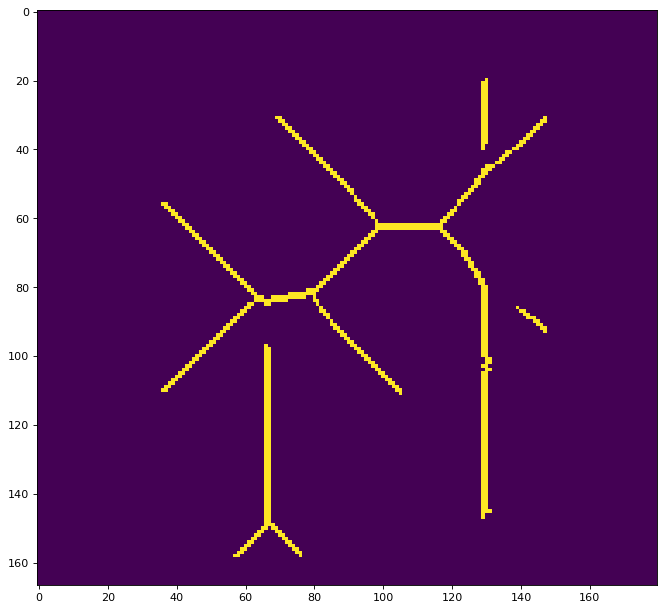

In [64]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(skeletonImage)